# 머신러닝 복습


# 1.환경준비

* 라이브러리 Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2.Regression : Carseat

## (1) 데이터 전처리
* 데이터 준비
* 가변수화
* 스케일링(필요하다면)
* 데이터 분할

### 1) 데이터 준비

* 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|----|----|----|
|	**Sales** 	|	 **각 지역 판매량(단위 : 1000개)**	|	**Target**	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


* 데이터 경로 : https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
carseat = pd.read_csv(path)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
target = 'Sales'
x = carseat.drop(target, axis=1)
y = carseat.loc[:, target]

### 2) 가변수화

In [4]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### 3) 데이터분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### 4) 스케일링

In [14]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## (2) 모델링
* 자신이 가장 자신있는 ML 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도해도 좋습니다.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1) 모델 선언

In [8]:
model = RandomForestRegressor()

### 2) 학습

In [15]:
model.fit(x_train, y_train)

RandomForestRegressor()

### 3) 예측

In [16]:
y_pred = model.predict(x_val)

### 4) 검증
* 만든 모델은 얼마나 정확한지 검증해 봅시다.
    * RMSE
    * MAE



In [17]:
print("RMSE:", mean_squared_error(y_val, y_pred)**(1/2))
print('MAE:', mean_absolute_error(y_val, y_pred))

RMSE: 1.7719264422867556
MAE: 1.3521137499999998


# 3.Classification : mobile

## (1) 데이터 전처리

### 1) 데이터 준비

In [18]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE':1})
data.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
0,31953,0,6,313378,161,0,4,0
1,36147,0,13,800586,244,0,6,0
2,27273,230,0,305049,201,16,15,0
3,120070,38,33,788235,780,3,2,1
4,29215,208,85,224784,241,21,1,0


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|----|----|----|----|----|
|	**Target**	|	**CHURN**	|	이탈여부	|	범주	| 0,1	|
|	feature	|	INCOME	|	소득수준(달러)	|	숫자	|		|
|	feature	|	OVERAGE	|	월평균 초과사용시간(분)	|	숫자	| |
|	feature	|	LEFTOVER	|	월평균 잔여시간(%)	|	숫자	| 	|
|	feature	|	HOUSE	|	집가격(달러)	|	숫자	|	|
|	feature	|	HANDSET_PRICE	|	휴대폰가격(달러)	|	숫자	|		|
|	feature	|	OVER_15MINS_CALLS_PER_MONTH	|	월평균 장기통화 횟수	|	숫자	| 		|
|	feature	|	AVERAGE_CALL_DURATION	|	평균통화시간(분)	|	숫자	|		|

In [19]:
# x, y 분할
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2) 가변수화

In [ ]:
# 불필요

### 3) 데이터분할

In [20]:
x_train, x_val , y_train, y_val = train_test_split( x, y, test_size = .3, random_state = 20)

### 4) Scaling

## (2) 모델링
* 자신이 가장 자신있는 ML 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도해도 좋습니다.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

### 1) 모델 선언

In [38]:
model_dt = DecisionTreeClassifier()

params = {'max_depth':range(1,100)}

model = RandomizedSearchCV(model_dt,
                           params,
                           cv = 10,
                           n_iter = 10,
                           scoring = 'accuracy')

### 2) 학습

In [39]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 100)},
                   scoring='accuracy')

### 3) 예측

In [40]:
y_pred = model.predict(x_val)

### 4) 검증
* 만든 모델은 얼마나 정확한지 검증해 봅시다.
    * confusion matrix
    * classification report



In [41]:
print(confusion_matrix(y_val, y_pred))

[[1958 1122]
 [1059 1861]]


In [42]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      3080
           1       0.62      0.64      0.63      2920

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.64      6000



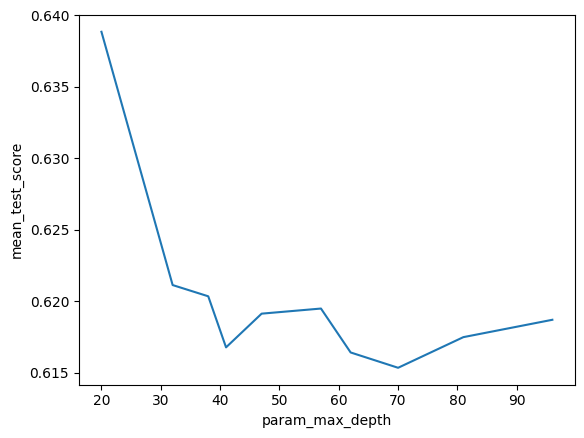

In [43]:
result = pd.DataFrame(model.cv_results_)
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result)
plt.show()